# 📊 Module: Understanding Logistic Regression

**Subject**: ITELEC303 - Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  

## 🎯 Learning Objectives
By the end of this module, you will be able to:
- Explain what logistic regression is and how it differs from linear regression
- Understand the concept of **classification** (Yes/No, Pass/Fail, etc.)
- Interpret the **logistic (sigmoid) function** and predicted probabilities
- Build and evaluate a logistic regression model in Python
- Apply logistic regression to real-world decision-making

> 💡 **Note**: Logistic regression is one of the most widely used tools in business, healthcare, and tech for making **binary decisions**.

## 🔁 Linear vs. Logistic Regression: What’s the Difference?

| **Linear Regression** | **Logistic Regression** |
|------------------------|--------------------------|
| Predicts a **continuous number** (e.g., salary, temperature) | Predicts a **category** (e.g., Yes/No, Spam/Not Spam) |
| Output: `y = mx + b` → any number | Output: **Probability** between 0 and 1 |
| Example: "How much will a house sell for?" | Example: "Will this customer **buy** or **not buy**?" |

👉 **Logistic regression is for classification**, not prediction of exact values.

In [6]:
!pip install matplotlib

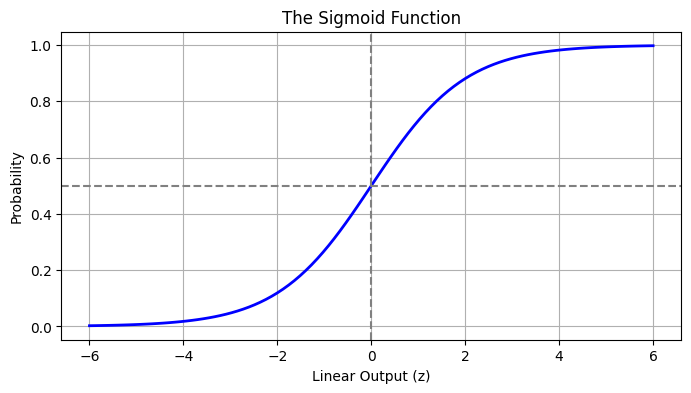

In [7]:
# Let's visualize the sigmoid function
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-6, 6, 100)
prob = sigmoid(z)

plt.figure(figsize=(8, 4))
plt.plot(z, prob, color='blue', linewidth=2)
plt.axhline(0.5, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title('The Sigmoid Function')
plt.xlabel('Linear Output (z)')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

## 🧠 The Big Idea: From Line to S-Curve (Sigmoid)

Instead of a straight line, logistic regression uses an **S-shaped curve** called the **sigmoid function**:

$$
\text{Probability} = \frac{1}{1 + e^{-(b_0 + b_1 x)}}
$$

- If probability ≥ 0.5 → predict **1** (e.g., "Yes")
- If probability < 0.5 → predict **0** (e.g., "No")

This turns a linear combination into a **probability**!

## 🌟 Real-World Use Cases

Logistic regression is used everywhere:
- 🏥 **Healthcare**: Will this patient have heart disease? (Yes/No)
- 📧 **Email**: Is this message spam? (Spam/Not Spam)
- 💳 **Finance**: Will this customer default on a loan? (Default/No Default)
- 🛒 **Marketing**: Will this user click on an ad? (Click/No Click)

It’s simple, fast, interpretable—and often surprisingly accurate!

## 🛠️ Hands-On: Build a Logistic Regression Model

We’ll use a **sample dataset** about student exam results:
- `hours_studied`: How many hours the student studied
- `exam_result`: 1 = Passed, 0 = Failed

Goal: Predict whether a student will **pass or fail** based on study time.

In [8]:
# Create a small synthetic dataset
import pandas as pd

data = {
    'hours_studied': [1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 9],
    'exam_result':    [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
df.head(10)

,hours_studied,exam_result
0,1,0
1,2,0
2,2,0
3,3,0
4,3,1
5,4,0
6,4,1
7,5,1
8,5,1
9,6,1


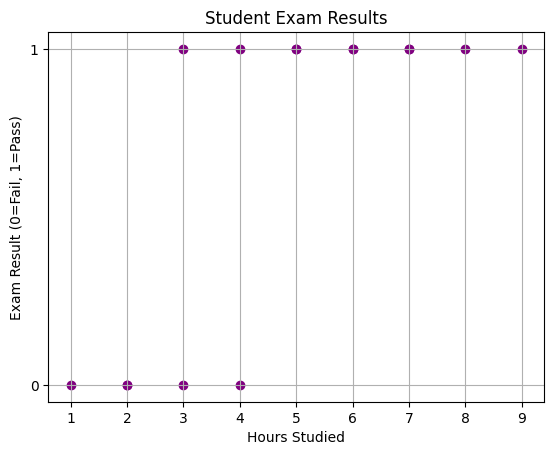

In [9]:
# Visualize the data
plt.scatter(df['hours_studied'], df['exam_result'], color='purple')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Result (0=Fail, 1=Pass)')
plt.title('Student Exam Results')
plt.yticks([0, 1])
plt.grid(True)
plt.show()

## 📈 Train the Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare features (X) and target (y)
X = df[['hours_studied']]  # Note: 2D array required
y = df['exam_result']

# Train the model
model = LogisticRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)
y_proba = model.predict_proba(X)[:, 1]  # Probability of passing

# Add predictions to dataframe
df['predicted'] = y_pred
df['probability_of_pass'] = y_proba

df

,hours_studied,exam_result,predicted,probability_of_pass
0,1,0,0,0.055668
1,2,0,0,0.157716
2,2,0,0,0.157716
3,3,0,0,0.372953
4,3,1,0,0.372953
5,4,0,1,0.653890
6,4,1,1,0.653890
7,5,1,1,0.857164
8,5,1,1,0.857164
9,6,1,1,0.950154


## 🔍 Interpret the Results

- If a student studies **2 hours**, the model says: ~20% chance of passing → **Predict: Fail**
- If a student studies **6 hours**, the model says: ~85% chance of passing → **Predict: Pass**

You can also see the **decision boundary** (where probability = 0.5):

C:\Users\Tricia\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


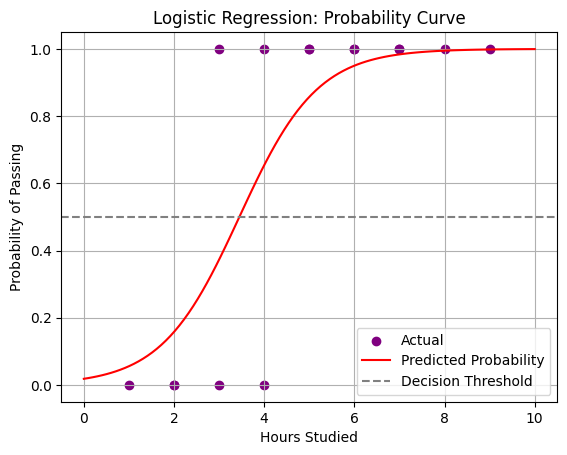

In [11]:

X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

plt.scatter(df['hours_studied'], df['exam_result'], color='purple', label='Actual')
plt.plot(X_test, y_prob, color='red', label='Predicted Probability')
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Probability Curve')
plt.legend()
plt.grid(True)
plt.show()

## 📊 Model Evaluation

For classification, we use:
- **Accuracy**: % of correct predictions
- **Confusion Matrix**: Shows True/False Positives/Negatives
- **Classification Report**: Precision, Recall, F1-score

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))

Accuracy: 0.8666666666666667

Confusion Matrix:
[[4 1]
 [1 9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.90      0.90      0.90        10

    accuracy                           0.87        15
   macro avg       0.85      0.85      0.85        15
weighted avg       0.87      0.87      0.87        15



## 💡 Why Logistic Regression Matters to You

As a future data analyst or developer:
- It’s often the **first model** you’ll try for binary decisions
- It’s **transparent**: You can explain *why* a prediction was made (e.g., “More study time increases pass probability”)
- It’s fast, stable, and works well with small datasets
- It’s the foundation for more advanced models (like neural networks!)

> ✅ **Remember**: You don’t always need deep learning. Sometimes, a simple logistic regression is all you need!

## 🧪 Try It Yourself!

**Challenge**: What happens if you add another feature (e.g., `previous_score`)?

1. Create a new dataset with two features
2. Train a logistic regression model
3. Interpret the coefficients

This is your first step toward **multivariate classification**!

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

data = {
    'hours_studied': [1,2,2,3,3,4,4,5,5,6,6,7,7,8,9],
    'previous_score': [50,55,52,60,58,65,63,70,72,75,78,80,82,85,90],
    'exam_result': [0,0,0,0,1,0,1,1,1,1,1,1,1,1,1]
}

df = pd.DataFrame(data)

In [20]:

X = df[['hours_studied', 'previous_score']]
y = df['exam_result']

model = LogisticRegression()
model.fit(X, y)

df['pred_prob'] = model.predict_proba(X)[:,1]

In [21]:
hours_range = np.linspace(df['hours_studied'].min(), df['hours_studied'].max(), 100)

prev_score_mean = df['previous_score'].mean()
logit = model.intercept_ + model.coef_[0][0]*hours_range + model.coef_[0][1]*prev_score_mean
sigmoid = 1 / (1 + np.exp(-logit))

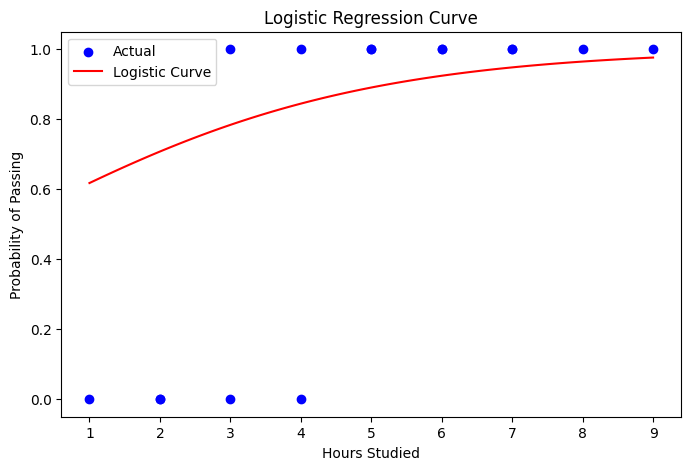

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(df['hours_studied'], df['exam_result'], color='blue', label='Actual')
plt.plot(hours_range, sigmoid, color='red', label='Logistic Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression Curve')
plt.legend()
plt.show()

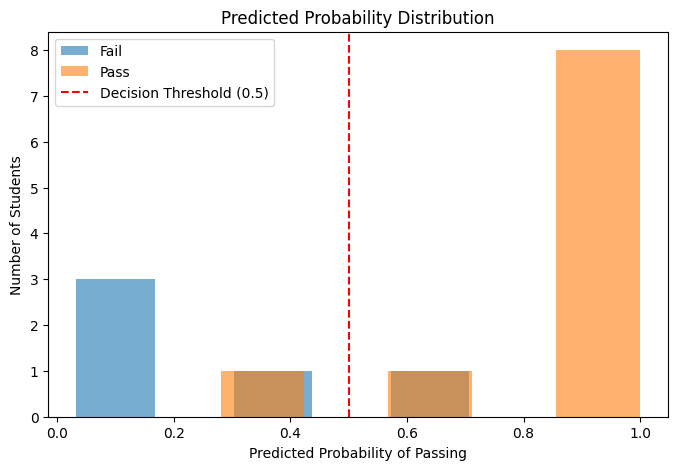

In [24]:
plt.figure(figsize=(8,5))
plt.hist(df[df['exam_result']==0]['pred_prob'], bins=5, alpha=0.6, label='Fail')
plt.hist(df[df['exam_result']==1]['pred_prob'], bins=5, alpha=0.6, label='Pass')
plt.axvline(0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.xlabel('Predicted Probability of Passing')
plt.ylabel('Number of Students')
plt.title('Predicted Probability Distribution')
plt.legend()
plt.show()


Logistic Curve Plot:

X-Axis (Hours Studied): Shows the number of hours a student studied.
Y-Axis (Probability of Passing): Shows the model’s predicted chance of passing (0–1).
Blue Dots: Actual results (0 = fail, 1 = pass).
Red Curve: The model’s predicted probability. As hours studied increases, the chance of passing rises following a sigmoid (S-shaped) curve.

Predicted Probability Distribution Plot:

X-Axis (Predicted Probability): Model’s predicted chance of passing (0–1).
Y-Axis (Number of Students): How many students fall into each probability range.
Fail (0) and Pass (1) Histograms: Show how well the model separates the two groups.
Red Dashed Line (0.5): Threshold where predictions switch from fail (<0.5) to pass (≥0.5).
Interpretation: Students with predicted probability above 0.5 are predicted to pass; below 0.5, to fail. Good separation means the model is confident and accurate.


## 📚 Summary

- Logistic regression predicts **probabilities** for **binary outcomes**
- It uses the **sigmoid function** to squash outputs between 0 and 1
- It’s **interpretable, fast, and widely used** in real-world analytics
- Always evaluate with **accuracy, confusion matrix, and business context**

Next: We’ll explore **multiclass classification** and **real datasets** (like predicting customer churn)!